In [ ]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.23.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.23.5 which is incompatible.


In [ ]:
!pip install grakel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.22.4-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


In [ ]:
from grakel.datasets import fetch_dataset
from grakel.kernels import ShortestPath
import grakel

# Loads the MUTAG dataset
MUTAG = fetch_dataset("MUTAG", verbose=False)
G, y = MUTAG.data, MUTAG.target

In [ ]:
len(G)

188

In [ ]:
# getting the first and second graphs
G_0 = G[0]
G_1 = G[1]

In [ ]:
# TASK 1.1

for val in [1e-4, 1e-3, 1e-2, 0.1, 0.9]:
  r_walk = grakel.RandomWalk(lamda = val)
  kernel = r_walk.fit_transform([G_0, G_1])

  print(val)
  print(kernel, '\n')

0.0001
[[289.14448469 221.10646075]
 [221.10646075 169.07844358]] 

0.001
[[290.45251269 222.07010608]
 [222.07010608 169.78837985]] 

0.01
[[304.33785326 232.28317307]
 [232.28317307 177.30075089]] 

0.1
[[637.43291573 469.03596206]
 [469.03596206 345.90763142]] 

0.9
[[-113.40220843  -90.06825448]
 [ -90.06825448  -79.71453614]] 



/usr/local/lib/python3.8/dist-packages/grakel/kernels/random_walk.py:128: UserWarning: random-walk series may fail to converge
  warnings.warn('random-walk series may fail to converge')


In [ ]:
# TASK 1.2

import numpy as np
from sklearn.model_selection import KFold

def calculate_mean_std(kernel_list, lamda):
  mean = sum(kernel_list) / len(kernel_list)
  mean = np.mean(kernel_list, axis=0)
  std = np.std(kernel_list, axis=0)
  print(lamda)
  print('mean')
  print(mean)
  print('std')
  print(std, '\n')


for val in [1e-4, 1e-3, 1e-2, 0.1, 0.9]:
  r_walk = grakel.RandomWalk(lamda = val)
  kf = KFold(n_splits=5)
  
  kernels = []
  for train, test in kf.split(G[:40]):
    samples_indices = sorted(np.concatenate([train, test]))
    G_sub = np.array(G[:40])[samples_indices]
    kernel = r_walk.fit_transform(G_sub)
    kernels.append(np.array(kernel))
  calculate_mean_std(np.array(kernels), val)


0.0001
mean
[[289.14448469 221.10646075 221.10646075 ... 255.12166812 255.12166996
  221.10646075]
 [221.10646075 169.07844358 169.07844358 ... 195.08964887 195.08965019
  169.07844358]
 [221.10646075 169.07844358 169.07844358 ... 195.08964887 195.08965019
  169.07844358]
 ...
 [255.12166812 195.08964887 195.08964887 ... 225.10245479 225.10245627
  195.08964887]
 [255.12166996 195.08965019 195.08965019 ... 225.10245627 225.10245779
  195.08965019]
 [221.10646075 169.07844358 169.07844358 ... 195.08964887 195.08965019
  169.07844358]]
std
[[0.00000000e+00 0.00000000e+00 2.84217094e-14 ... 0.00000000e+00
  0.00000000e+00 2.84217094e-14]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.84217094e-14 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.84217094e-14 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.84

/usr/local/lib/python3.8/dist-packages/grakel/kernels/random_walk.py:128: UserWarning: random-walk series may fail to converge
  warnings.warn('random-walk series may fail to converge')


0.9
mean
[[-113.40220843  -90.06825448  -90.06825448 ...  -93.55223499
   -89.09668656  -90.06825448]
 [ -90.06825448  -79.71453614  -79.71453611 ...  -91.43263686
   -93.35834713  -79.71453616]
 [ -90.06825448  -79.71453611  -79.71453619 ...  -91.43263685
   -93.35834713  -79.71453556]
 ...
 [ -93.55223499  -91.43263686  -91.43263685 ...  -56.09485568
   -75.29944408  -91.43263686]
 [ -89.09668656  -93.35834713  -93.35834713 ...  -75.29944408
   -62.12958501  -93.35834713]
 [ -90.06825448  -79.71453616  -79.71453556 ...  -91.43263686
   -93.35834713  -79.71453621]]
std
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.10542736e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.000

In [ ]:
# TASK 1.3

import time

for method in ["baseline", "fast"]:
  r_walk = grakel.RandomWalk(lamda = 1e-3, method_type = method)
  
  time_start = time.time()
  kernel = r_walk.fit_transform(G[:50])
  print(f"{method}: {time.time() - time_start:.2f}")

baseline: 14.47
fast: 0.62


# Task 3

In the direct product graph, there is a vertex for all pairs of vertices of G and H with the same label. Two vertices in the direct product graph are adjacent if and only if the associated pairs of vertices are adjacent in G and H

In [ ]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 6.2 MB/s 


In [ ]:
import igraph as ig
import matplotlib.pyplot as plt

def make_direct_product(g_0, g_1):
  vertex_list = []
  labels_list = []
  for i in range(len(g_0.vs)):
    for j in range(len(g_1.vs)):
      if g_0.vs[i]['label'] == g_1.vs[j]['label']:# and (j, i) not in vertex_list:
        vertex_list.append((i, j))
        labels_list.append(g_0.vs[i]['label'])

  print('vertex_list', vertex_list)
  print('labels_list', labels_list)

  edges_list = []
  g_0_adj = g_0.get_adjacency()
  g_1_adj = g_1.get_adjacency()
  
  for i in range(len(vertex_list)):
    for j in range(len(vertex_list)):
      if i == j:
        continue
      
      adjacent_0 = g_0_adj[vertex_list[i][0], vertex_list[j][0]]
      adjacent_1 = g_1_adj[vertex_list[i][1], vertex_list[j][1]]

      if adjacent_0 and adjacent_1 and (j, i) not in edges_list:
        edges_list.append((i, j))

  print('edges_list', edges_list)
  
  g = ig.Graph(len(vertex_list), edges_list)
  g.vs["label"] = labels_list
  return g

# Test case
Note: numbers on the third graph are messed up
1st number corresponds to the center graph, 2nd corresponds to the left

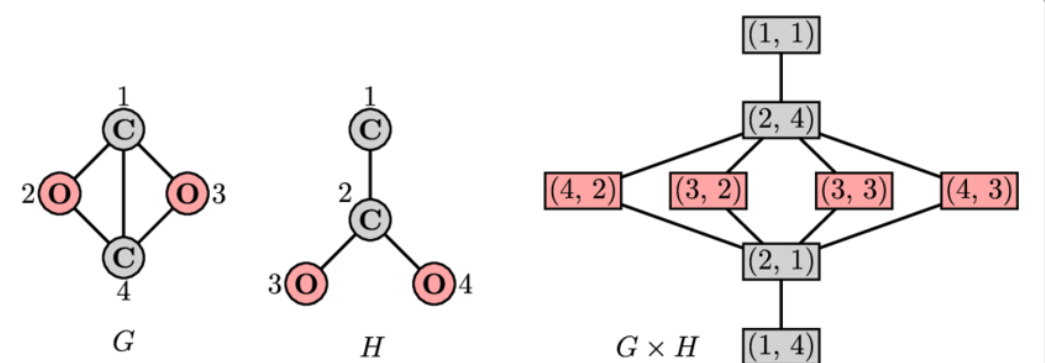

vertex_list [(0, 0), (0, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 0), (3, 1)]
labels_list [0, 0, 1, 1, 1, 1, 0, 0]
edges_list [(0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 7), (3, 7), (4, 7), (5, 7)]


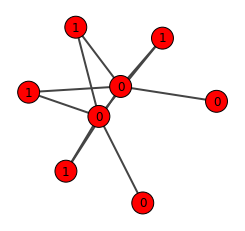

In [ ]:
g_test_0 = ig.Graph(4, [(0, 1), (0, 2), (0, 3), (1, 3), (2, 3)])
g_test_1 = ig.Graph(4, [(0, 1), (1, 2), (1, 3)])

g_test_0.vs["label"] = [0, 1, 1, 0]
g_test_1.vs["label"] = [0, 0, 1, 1]

g_test_result = make_direct_product(g_test_0, g_test_1)

fig, ax = plt.subplots(1)
ig.plot(g_test_result, target=ax)

vertex_list [(0, 0), (0, 2), (0, 3), (1, 1), (1, 4), (2, 0), (2, 2), (2, 3), (3, 1), (3, 4)]
labels_list [0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
edges_list [(0, 4), (1, 3), (1, 4), (2, 3), (2, 4), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 9), (6, 8), (6, 9), (7, 8), (7, 9)]


Text(0.5, 1.0, 'graph_result')

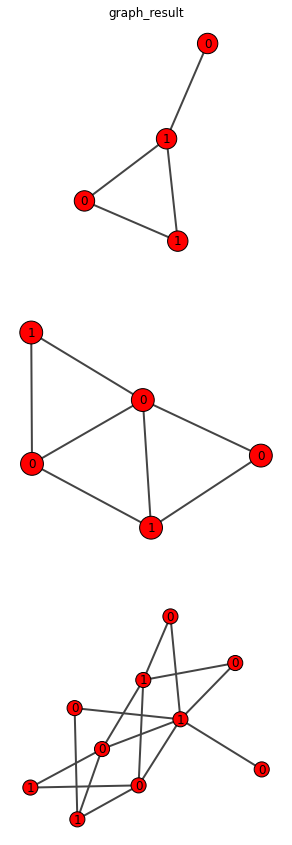

In [ ]:
g_0 = ig.Graph(4, [(0, 1), (1, 2), (1, 3), (2, 3)])
g_1 = ig.Graph(5, [(1, 2), (1, 3), (2, 3), (2, 4), (2, 0), (3, 4), (4, 0)])

g_0.vs["label"] = [0, 1, 0, 1]
g_1.vs["label"] = [0, 1, 0, 0, 1]

g_result = make_direct_product(g_0, g_1)

fig, axs = plt.subplots(3, figsize=(15, 15))
ig.plot(g_0, target=axs[0])
axs[0].set_title('graph_0')
ig.plot(g_1, target=axs[1])
axs[0].set_title('graph_1')
ig.plot(g_result, target=axs[2])
axs[0].set_title('graph_result')